In [45]:
from Layer import Layer
from NeuralNetwork import NeuralNetwork

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import one_hot_encode
from genieclust.plots import plot_scatter

def load_data_classification(path, plot=False):
    raw = pd.read_csv(path)
    set_ = raw.loc[:, ["x", "y"]]
    labels_ = raw.cls
    if plot:
        plot_scatter(set_, labels_)
    return np.array(set_), np.array(labels_).reshape(-1, 1)

In [304]:
n = 1000
X_train, y_train = load_data_classification("MGU_projekt1/Classification/data.circles.train.%d.csv" % n)
X_test, y_test = load_data_classification("MGU_projekt1/Classification/data.circles.test.%d.csv" % n)

df = pd.read_csv("MGU_projekt1/Classification/data.circles.train.%d.csv" % n)
df_test = pd.read_csv("MGU_projekt1/Classification/data.circles.test.%d.csv" % n)

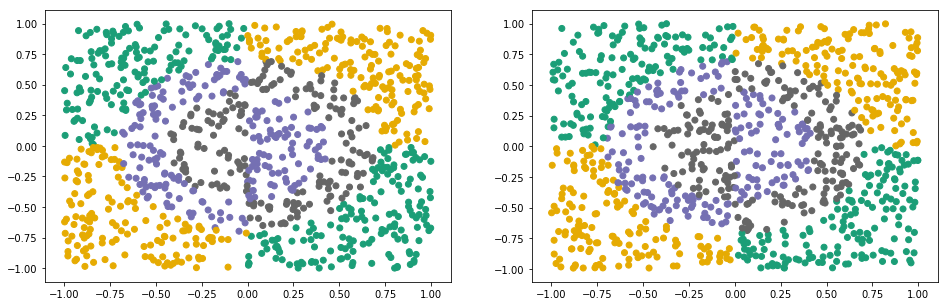

In [305]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
plt.show()

In [454]:
np.random.seed(1234)
nn = NeuralNetwork("cross_entropy", 0)
nn.add(Layer(20, 2, "sigmoid"))
nn.add(Layer(30, 20, "sigmoid"))
nn.add(Layer(3, 30, "softmax"))


nn = NeuralNetwork("cross_entropy", 0)
nn.add(Layer(2, 2, "sigmoid"))

nn = NeuralNetwork("cross_entropy", 0)
nn.add(Layer(3, 2, "sigmoid"))
nn.add(Layer(5, 3, "sigmoid"))
nn.add(Layer(4, 5, "sigmoid"))

In [455]:
loss, test_loss, grad_norm = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=300,
    learning_rate=1e-2
)

299

In [456]:
loss2, test_loss2, grad_norm2 = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=300,
    learning_rate=1e-1
)

299

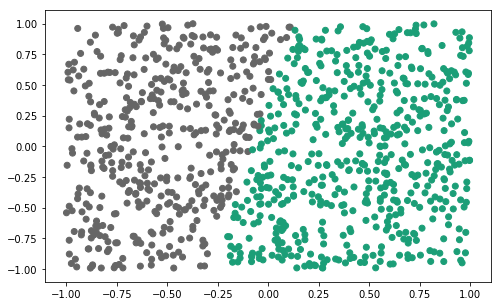

In [457]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

In [458]:
loss3, test_loss3, grad_norm3 = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=2000,
    learning_rate=1e-0
)

1999

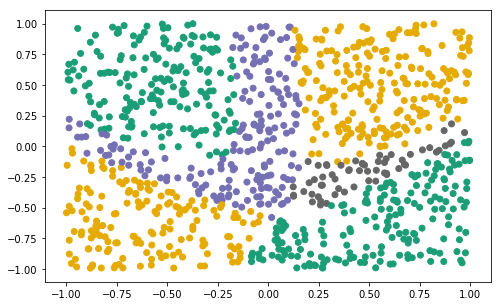

In [459]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

In [460]:
loss4, test_loss4, grad_norm4 = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=1400,
    learning_rate=1e-0
)

1399

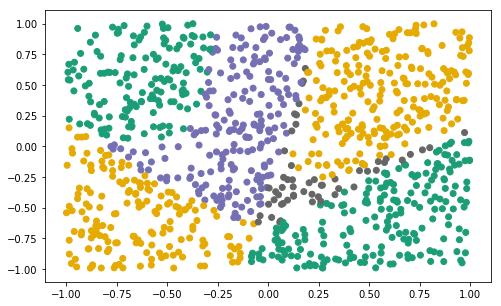

In [461]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

In [462]:
loss5, test_loss5, grad_norm5 = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=10000,
    learning_rate=1e-0
)

9999

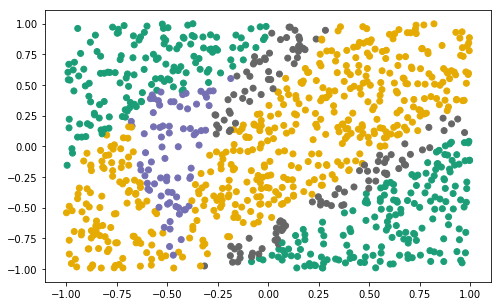

In [463]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

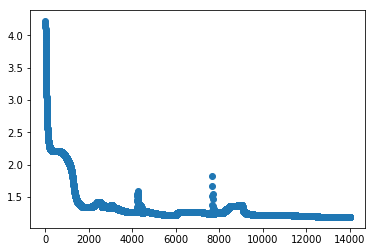

In [467]:
plt.scatter(np.arange(len(loss+loss2+loss3+loss4+loss5)), loss+loss2+loss3+loss4+loss5)
plt.show()

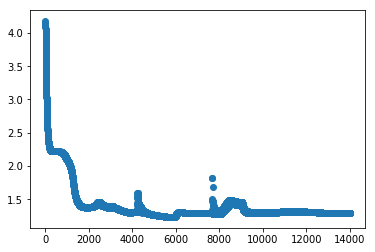

In [468]:
plt.scatter(np.arange(len(test_loss+test_loss2+test_loss3+test_loss4+test_loss5)), test_loss+test_loss2+test_loss3+test_loss4+test_loss5)
plt.show()

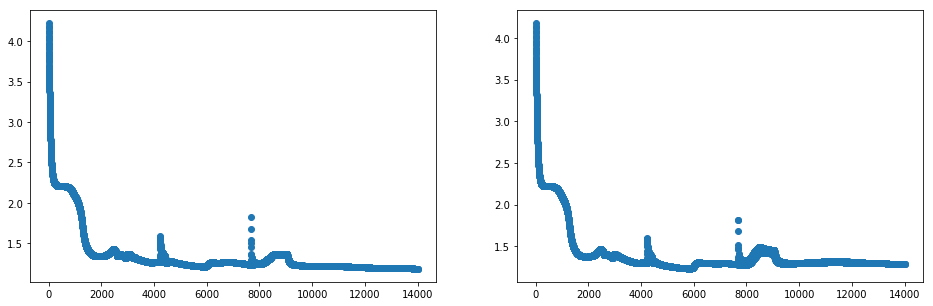

In [471]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(loss+loss2+loss3+loss4+loss5)), loss+loss2+loss3+loss4+loss5)
plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(test_loss+test_loss2+test_loss3+test_loss4+test_loss5)), test_loss+test_loss2+test_loss3+test_loss4+test_loss5)
plt.show()